In [1]:
import sys
import pickle
sys.path.append('../..')
from datetime import datetime 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse 
from comp_models import ss, conf_ss, plot_comp, conf_all_models, ss_all_models

In [2]:
CITY = 2304400
CITY_NAME = 'Fortaleza'
STATE = 'CE'

There is some abreviations in this notebook: 
- **TL** refers to the transfer learning model;
- **NN** refers to the Bi-LSTM model;
- **ML** refers to the PGBM model; 
- **SS** refers to Skill Score. 

### Comp the predictions with loss = MSLE: 

We will analyse these data between '2022-01-02' e '2022-05-08':

In [3]:
with open(f'../../predictions/lstm/lstm_{CITY}_chik_predictions_msle_all.pkl', 'rb') as f:
    data_nn = pickle.load(f)
    
doenca = 'dengue'
with open(f'../../predictions/pgbm/pgbm_{CITY}_chik_cross_predictions.pkl', 'rb') as f:
        data_ml = pickle.load(f)

with open(f'../../predictions/lstm/tl_{CITY}_transf_msle.pkl', 'rb') as f:
        data_tl = pickle.load(f)

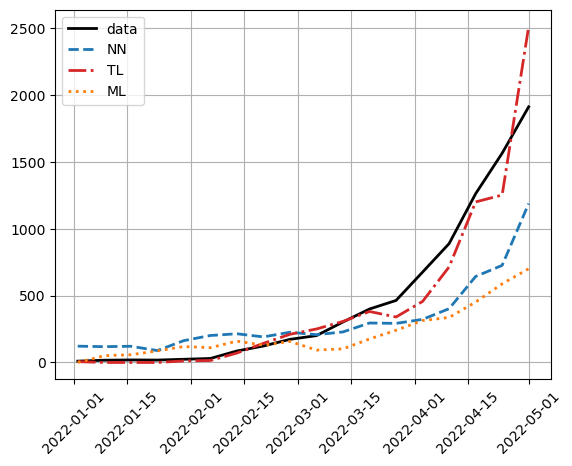

RMSE - ML: 452.9957652016011
RMSE - NN: 343.9529349675427
RMSE - TL: 176.80120274834076


In [4]:
ini_evaluate = '2022-01-02'
end_evaluate = '2022-05-08'

plot_comp(data_nn, data_ml, data_tl, ini_evaluate, end_evaluate)

In [5]:
conf_all_models(data_nn, data_ml, data_tl, ini_evaluate, end_evaluate)

---------------------------
NN compared to ML:
lower: -0.9696877236076582
upper: 0.049006913665573415
---------------------------
TL compared to NN:
lower: 0.6606658849521394
upper: 0.8637952327816208
---------------------------
TL compared to ML:
lower: 0.6178825105445325
upper: 0.7340279492013619
---------------------------


Let's see the value of SS by period considering de LOSS MSLE: 

In [6]:
INI_EVALUATE  = '2022-01-02'
END_EVALUATE = f'2022-02-06'

ss_all_models(data_nn, data_ml, data_tl, INI_EVALUATE, END_EVALUATE)

---------------------------
NN compared to ML:
SS: -0.8711283380659665
---------------------------
TL compared to NN:
SS: 0.8594808100215575
---------------------------
TL compared to ML:
SS: 0.7370705615892612
---------------------------


In [7]:
INI_EVALUATE  = '2022-01-02'
END_EVALUATE = f'2022-03-06'

ss_all_models(data_nn, data_ml, data_tl, INI_EVALUATE, END_EVALUATE)

---------------------------
NN compared to ML:
SS: -0.9696877236076582
---------------------------
TL compared to NN:
SS: 0.8243546874663805
---------------------------
TL compared to ML:
SS: 0.6540335841932995
---------------------------


In [8]:
INI_EVALUATE  = '2022-01-02'
END_EVALUATE = f'2022-04-10'

ss_all_models(data_nn, data_ml, data_tl, INI_EVALUATE, END_EVALUATE)

---------------------------
NN compared to ML:
SS: 0.049006913665573415
---------------------------
TL compared to NN:
SS: 0.5028804641426733
---------------------------
TL compared to ML:
SS: 0.5272427583179032
---------------------------


In [9]:
INI_EVALUATE  = '2022-01-02'
END_EVALUATE = f'2022-05-08'

ss_all_models(data_nn, data_ml, data_tl, INI_EVALUATE, END_EVALUATE)

---------------------------
NN compared to ML:
SS: 0.24071489980823546
---------------------------
TL compared to NN:
SS: 0.48597268761487766
---------------------------
TL compared to ML:
SS: 0.6097067206143589
---------------------------
